<a href="https://colab.research.google.com/github/Brohammad/Wine-Quality-Prediction/blob/main/Wine_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Model Performance:
Accuracy: 0.6594
Precision: 0.6309
Recall: 0.6594
------------------------------


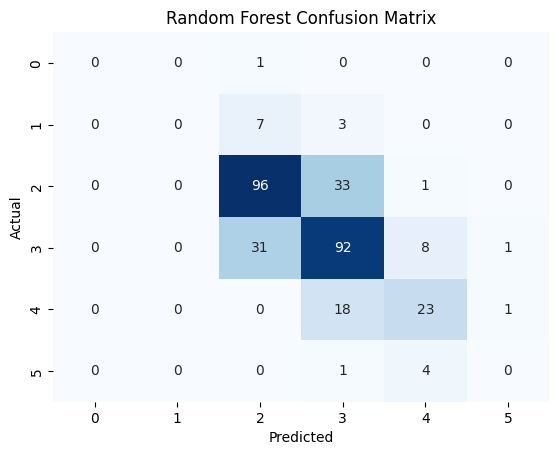

Decision Tree Model Performance:
Accuracy: 0.5625
Precision: 0.5533
Recall: 0.5625
------------------------------


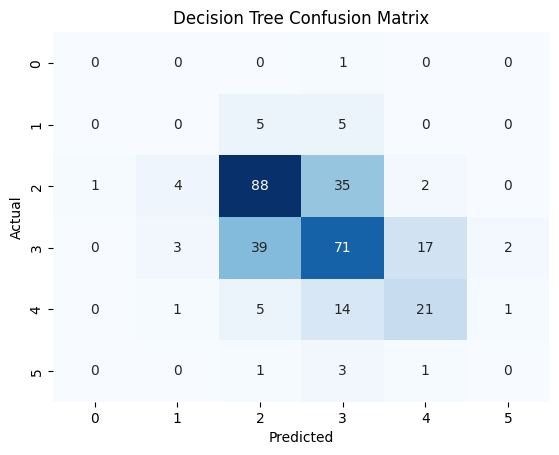

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the dataset
# You can download the dataset from https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
# Or using Kaggle API
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

# Preview the data
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Feature matrix X and target vector y
X = data.drop(columns='quality')
y = data['quality']

# Perform a train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional, Random Forest and Decision Trees don't need it)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model 2: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Evaluation function
def evaluate_model(model_name, y_test, y_preds):
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds, average='weighted')
    recall = recall_score(y_test, y_preds, average='weighted')
    print(f'{model_name} Model Performance:')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print('-'*30)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate Random Forest
evaluate_model("Random Forest", y_test, rf_preds)

# Evaluate Decision Tree
evaluate_model("Decision Tree", y_test, dt_preds)
